In [1]:
import torch
from libs import TensorList
from libs.optimization import GaussNewtonCGBase, L2Problem

In [5]:
class res_func(L2Problem):
    def __init__(self):
        self.num_dim, self.num_var = 300, 100
        self.A = torch.rand(self.num_dim, self.num_var) - 0.5
        self.y = torch.rand(self.num_dim) - 0.5
        self.lam = 0.1
        
    def __call__(self, x):
        return TensorList([self.A @ x[0] - self.y, self.lam * x[0]])
    
class res_func2(L2Problem):
    def __init__(self):
        self.num_dim = 300
        self.num_var = (100, 20)
        self.A = torch.rand(self.num_dim, self.num_var[0]) - 0.5
        self.y = torch.rand(self.num_dim) - 0.5
        self.lam = 0.01
        
    def __call__(self, x):
        return TensorList([(self.A @ x[0]) @ x[1] - self.y, self.lam * x[0], self.lam * x[1]])


class res_func3(L2Problem):
    def __init__(self):
        self.num_dim = 5000
        self.num_var = (500, 50, 100)
        self.A = torch.rand(self.num_dim, self.num_var[0]) - 0.5
        self.y = torch.rand(self.num_dim) - 0.5
        self.lam = 0.1
        
    def __call__(self, x):
        return TensorList([((self.A @ x[0]) @ x[1]) @ x[2] - self.y, self.lam * x[0], self.lam * x[1], self.lam * x[2]])


Stopped CG since rho = 0


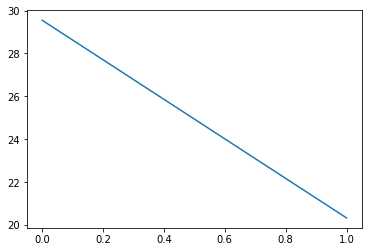

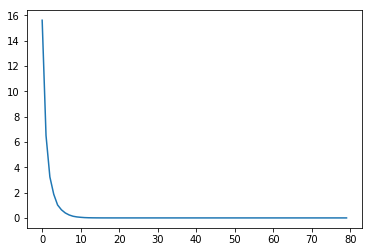

tensor([-0.0276, -0.0822,  0.0073,  0.0374,  0.0067, -0.1367, -0.0448, -0.0964,
        -0.0023,  0.0376, -0.0607, -0.0264,  0.0603,  0.0034,  0.0377,  0.0765,
        -0.0766,  0.0320, -0.1045,  0.1392,  0.0376, -0.0361,  0.0021,  0.0305,
        -0.0399, -0.0390, -0.1358,  0.0274, -0.1612, -0.1060, -0.0076, -0.1255,
        -0.1872, -0.0815,  0.0947,  0.1283,  0.0156,  0.0939,  0.1780, -0.0116,
        -0.1409, -0.0612,  0.0384, -0.0644, -0.0159, -0.1085,  0.0940,  0.0139,
         0.0999, -0.0720,  0.0534,  0.0137, -0.1011,  0.0407, -0.0045, -0.0497,
        -0.0675,  0.0066, -0.0291, -0.0171,  0.0221,  0.0033, -0.0466,  0.0787,
         0.0699,  0.0443,  0.0801, -0.0524,  0.0454, -0.1210, -0.0645, -0.1005,
         0.0817,  0.0157,  0.1168,  0.0470, -0.0224, -0.0655, -0.0783,  0.0686,
         0.0639, -0.0105, -0.0560, -0.0308, -0.0234,  0.0709, -0.0243,  0.0429,
        -0.0124, -0.0759,  0.0183, -0.0126, -0.1017,  0.0239, -0.0193,  0.0621,
         0.1576, -0.0332,  0.0558,  0.11

In [3]:
f = res_func()
x = TensorList([torch.zeros(f.num_var)])

opt = GaussNewtonCGBase(f, x, debug=True, fletcher_reeves = False)

x_opt, _, _ = opt.run_GN(f.num_var,1)

x_opt = x_opt[0]

x_true = torch.inverse(f.A.t() @ f.A + f.lam**2 * torch.eye(f.num_var)) @ (f.A.t() @ f.y)

print(x_true)
print(x_opt)
print('Error:  {}'.format(torch.mean((x_true - x_opt).abs())))

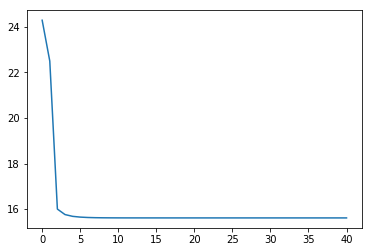

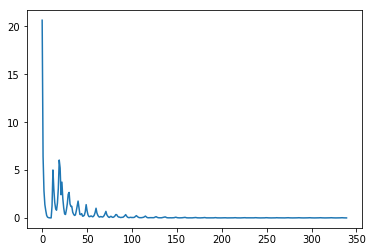

[tensor([[-0.0839,  0.1223,  0.0157,  ..., -0.2422, -0.2716, -0.2770],
        [ 0.1612, -0.3880,  0.4618,  ..., -0.1637, -0.4318,  0.2108],
        [-0.2493,  0.3363,  0.5845,  ..., -0.3760,  0.0837,  0.2835],
        ...,
        [ 0.1029, -0.0361, -0.3289,  ...,  0.0517, -0.0146,  0.2930],
        [ 0.5849, -0.0852,  0.5769,  ..., -0.1209,  0.2504,  0.1451],
        [ 0.4476, -0.2466,  0.3183,  ...,  0.0702, -0.0489, -0.1777]]), tensor([-0.0083, -0.0295, -0.0319, -0.0104, -0.0353,  0.0453, -0.0037, -0.0013,
         0.0533, -0.0254,  0.0207,  0.0410,  0.0208,  0.0331,  0.0083, -0.0115,
         0.0416, -0.0155, -0.0034,  0.0003])]


In [6]:
f = res_func2()
x = TensorList([torch.rand(f.num_var)-0.5, torch.zeros(f.num_var[1])])
#x = TensorList([torch.rand(f.num_var[:2])-0.5, torch.rand(f.num_var[1:])-0.5, torch.zeros(f.num_var[2])])

opt = GaussNewtonCGBase(f, x, cg_eps=0.001, debug=True, fletcher_reeves = False, direction_forget_factor = 0.0)



num_cg_iter = [10]*20 + [5]*20
x_opt, _, _ = opt.run_GN(num_cg_iter)

#v_opt = x_opt[0] @ x_opt[1]
#v_true = torch.inverse(f.A.t() @ f.A + f.lam**2 * torch.eye(f.num_var[0])) @ (f.A.t() @ f.y)

print(x_opt)
#print(v_true)
#print(v_opt)
#print('Error:  {}'.format(torch.mean((v_true - v_opt).abs())))

In [7]:
x2 = x.clone()
x2[0][0] = 999

print(x)
print(x2)

[tensor([-0.0704,  0.0250,  0.0749, -0.0505, -0.0594, -0.1319, -0.0526,  0.0389,
        -0.0881, -0.1601, -0.0027, -0.0392, -0.0683, -0.0022, -0.0738, -0.1079,
         0.0137, -0.0021, -0.0468, -0.0292,  0.0535,  0.1109, -0.0987, -0.0746,
         0.0933, -0.2029, -0.0703, -0.0227,  0.0334, -0.1183, -0.0231, -0.0288,
         0.0978, -0.0226,  0.0294,  0.0718, -0.0280, -0.0395, -0.0891, -0.0774,
         0.0205, -0.0339,  0.1106,  0.0599, -0.0492,  0.0981, -0.0370, -0.0644,
        -0.0494, -0.1253, -0.0846, -0.1396,  0.0042,  0.0904, -0.0817, -0.0662,
         0.1325,  0.0923, -0.0689, -0.0553, -0.0407, -0.1859, -0.1087, -0.0028,
        -0.0280, -0.0083,  0.0600,  0.0107,  0.0619, -0.0029, -0.0350, -0.0903,
         0.0097,  0.0072, -0.1296,  0.0203, -0.1710, -0.0013, -0.0654,  0.0137,
        -0.2228,  0.0384, -0.0001,  0.0465, -0.0630,  0.0515, -0.0165, -0.0135,
         0.0165, -0.0676,  0.1179,  0.1350,  0.0365,  0.2121, -0.0056,  0.0196,
         0.0257, -0.0373,  0.0368, -0.1